<a name='top'></a>

---

<table style="width:100%; border: 2px solid; border-color: #3D5F74;">
		<tr style = 'border: 1px solid; border-color: #3D5F74;'>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3"><font size = 7><b>SKTime</b></font></th>
		</tr>
		<tr>
			<th style = 'font-size: 20px; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-weight: 525;' colspan="3">| <a href="https://www.sktime.org/en/stable/">Documentation</a>   |  <a href="https://youtu.be/GbRfbXHXUKM">PyData Global 2021</a>  |  <a href="https://github.com/sktime">SKTime GitHub</a>  |  </font></b></font></th>
		</tr>

		

</html>

In [1]:
from helpers import * 
from sklearn.datasets import load_diabetes
import matplotlib as mpl
%matplotlib inline
plt.style.use('dark_blue_greens.mplstyle')
css_styling()

<a name='scikit_learn'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>The SciKit-Learn Way</font></th>
		</tr>
	</table>
</html>

<p>
	
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #E1C7C2; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3"><a href = "https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset">Diabetes Dataset (documentation)</a></font></th>
		</tr>
	</table>
</html>

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [2]:
diabetes = load_diabetes()
input_data = diabetes['data']
target_data = diabetes['target']
input_df = pd.DataFrame(input_data, columns = diabetes['feature_names'])
target_series = pd.Series(target_data)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Inputs and Targets</font></th>
		</tr>
	</table>
</html>

* each input row is a different patient and their various data <br>
* the target data is the disease progression


In [3]:
head_tail_vert(input_df, 5, 'diabetes: input_data')

diabetes: input_data: head(5)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05


diabetes: input_data: tail(5)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.04,0.05,0.02,0.06,-0.01,-0.00,-0.03,-0.00,0.03,0.01
438,-0.01,0.05,-0.02,-0.07,0.05,0.08,-0.03,0.03,-0.02,0.04
439,0.04,0.05,-0.02,0.02,-0.04,-0.01,-0.02,-0.01,-0.05,0.02
440,-0.05,-0.04,0.04,0.00,0.02,0.02,-0.03,0.03,0.04,-0.03
441,-0.05,-0.04,-0.07,-0.08,0.08,0.03,0.17,-0.04,-0.00,0.00


In [4]:
head_tail_horz(target_series, 5, "diabetes: target_data")

diabetes: target_data


,0
0,151.00
1,75.00
2,141.00
3,206.00
4,135.00
,0
437,178.00
438,104.00
439,132.00
440,220.00


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Initial Visualization</font></th>
		</tr>
	</table>
</html>

In [5]:
cols = list(input_df.columns)

In [6]:
def plot_feature(df, 
				 column, 
				 color = None,
				 title = None,
				 xlabel = None, 
				 ylabel = None):
	
	if color:
		color = color
	else:
		color = 'C0'
	
	cols = list(input_df.columns)
	fig, ax = plt.subplots(1)
	col = cols.index(column)
	ax.scatter(input_data[:,col], target_data, color = color)
	ax.set_title(f'{column} vs. {ylabel}')
	ax.set(
		xlabel = f'{xlabel}: {diabetes["feature_names"][col]}',
		ylabel = f'{ylabel}');
	

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Visualization: age vs disease progression</font></th>
		</tr>
	</table>
</html>

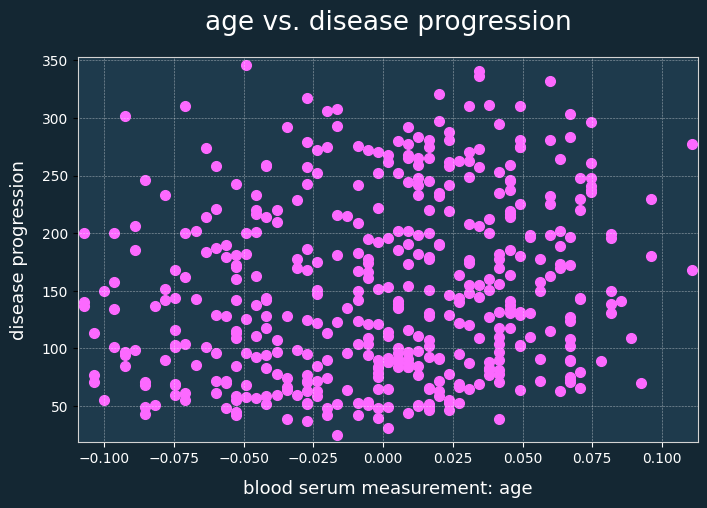

In [7]:
plot_feature(input_data, 
			 'age', 
			 xlabel = 'blood serum measurement', 
			 ylabel = 'disease progression')

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Visualization: bmi vs disease progression</font></th>
		</tr>
	</table>
</html>

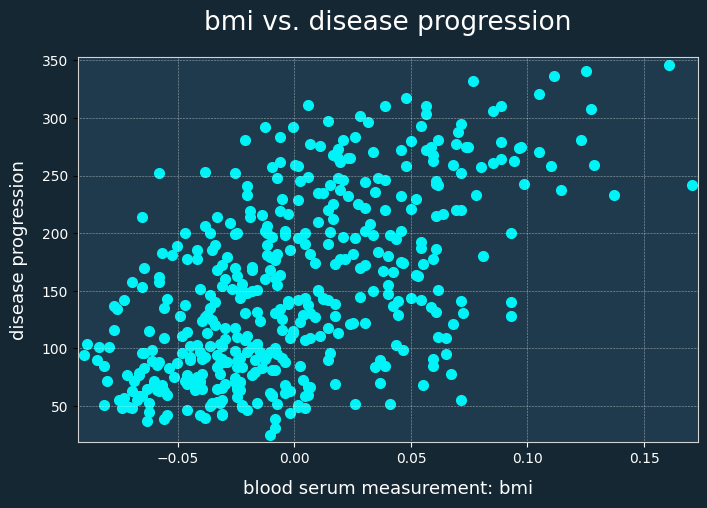

In [8]:
plot_feature(input_data, 
			 'bmi', 
			 xlabel = 'blood serum measurement', 
			 ylabel = 'disease progression',
			 color = 'C1')

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Visualization: bp vs disease progression</font></th>
		</tr>
	</table>
</html>

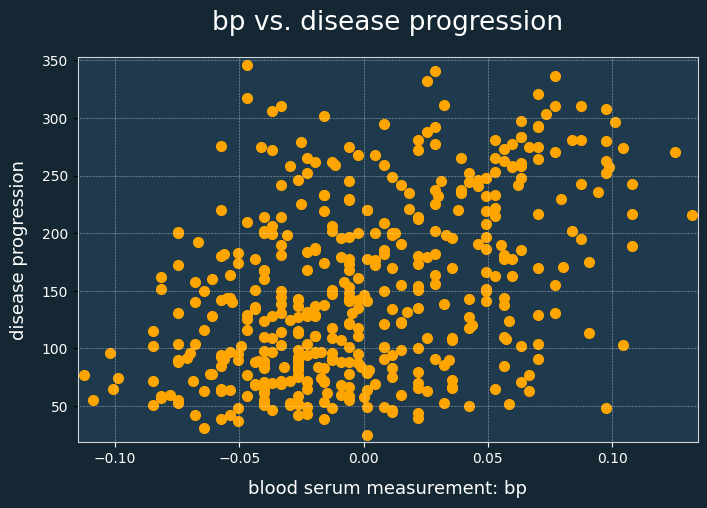

In [9]:
plot_feature(input_data, 
			 'bp', 
			 xlabel = 'blood serum measurement', 
			 ylabel = 'disease progression',
			 color = 'C2')

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Workflow with SciKit-Learn</font></th>
		</tr>
	</table>
</html>

1. Model Specification
2. Fitting
3. Prediction
4. Evaluation

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [11]:
train_in, test_in, train_out, test_out = train_test_split(input_df, target_series)
pretty(f'train_in.shape: {train_in.shape}')
pretty(f'train_out.shape: {train_out.shape}')
pretty(f'test_in.shape: {test_in.shape}')
pretty(f'test_out.shape: {test_out.shape}')

"train_in.shape: (331, 10)"


"train_out.shape: (331,)"


"test_in.shape: (111, 10)"


"test_out.shape: (111,)"


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Model</font></th>
		</tr>
	</table>
</html>

In [12]:
classifier = RandomForestRegressor()
classifier.fit(train_in, train_out)

RandomForestRegressor()

In [13]:
predictions = classifier.predict(test_in)

In [14]:
mean_squared_error(test_out, predictions)

3061.7472972972973

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Modular Model Building & Pipelines with SciKit-Learn</font></th>
		</tr>
	</table>
</html>

* Pipelining and transformers
* Tuning
* Ensembling

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [17]:
pipeline.fit(train_in, train_out)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [18]:
predictions = pipeline.predict(test_in)
mean_squared_error(test_out, predictions)

3184.0122522522524

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Summary</font></th>
		</tr>
	</table>
</html>

* cross-selectional input data, without any assumed temporal dependency or ordering
* three learning tasks: cross-sectional classification, regression, clustering
* a common estimator API for each learning task
* estimator APIs mirror learning tasks

<a name='sktime'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>The SKTime Way</font></th>
		</tr>
	</table>
</html>
	
* Check out tutorial from [PyData Amsterdam 2020 on GitHub](https://github.com/sktime/sktime-tutorial-pydata-amsterdam-2020)
* Simplest form of time series data is **univariate**, which has repeated observations of one variable or kind of measurement over time
	
<p>
	
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #E1C7C2; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3"><a href = "https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.datasets.load_lynx.html">Lynx Dataset (documentation)</a></font></th>
		</tr>
	</table>
</html>
	
The annual numbers of lynx trappings for 1821–1934 in Canada. This time-series records the number of skins of predators (lynx) that were collected over several years by the Hudson’s Bay Company. The dataset was taken from Brockwell & Davis (1991) and appears to be the series considered by Campbell & Walker (1977).

Dimensionality: univariate Series length: 114 Frequency: Yearly Number of cases: 1

This data shows aperiodic, cyclical patterns, as opposed to periodic, seasonal patterns.

In [19]:
from sktime.datasets import load_lynx
from sktime.utils.plotting import plot_series

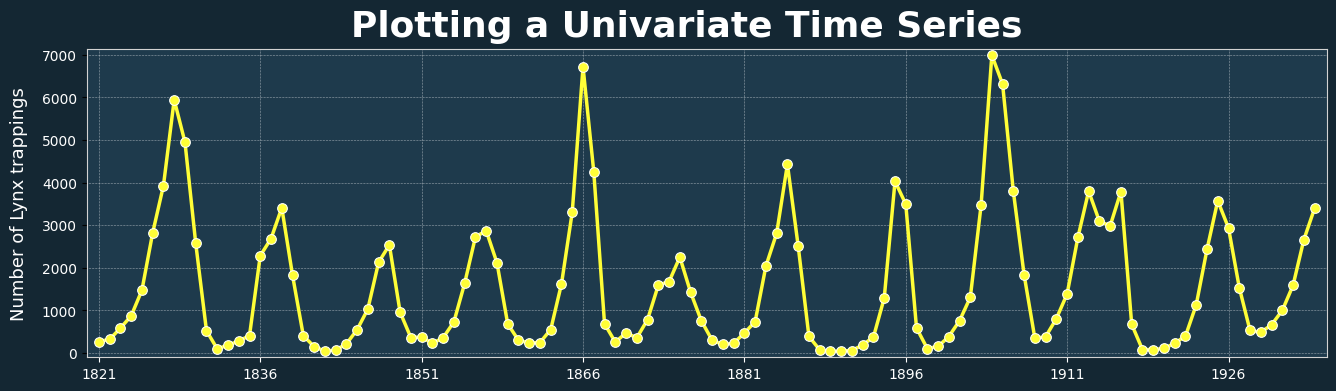

In [20]:
lynx = load_lynx()
plot_series(lynx, title = 'Plotting a Univariate Time Series', colors = ['C4']);

<a name = 'multivariate'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>Multivariate Data</font></th>
		</tr>
	</table>
</html>
* Repeated observations over time from multiple related variables or kinds of measurement
	
<p>
	
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #E1C7C2; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3"><a href = "https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.datasets.load_longley.html">Longley Dataset (documentation)</a></font></th>
		</tr>
	</table>
</html>

This mulitvariate time series dataset contains various US macroeconomic variables from 1947 to 1962 that are known to be highly collinear.

Dimensionality: multivariate, 6 Series length: 16 Frequency: Yearly Number of cases: 1

Variable description:

TOTEMP - Total employment GNPDEFL - Gross national product deflator GNP - Gross national product UNEMP - Number of unemployed ARMED - Size of armed forces POP - Population


In [21]:
from sktime.datasets import load_longley

In [22]:
targets, inputs = load_longley()

In [23]:
head_tail_horz(inputs, 5, 'Inputs')

Inputs


,GNPDEFL,GNP,UNEMP,ARMED,POP
Period,,,,,
1947,83.00,"234,289.00","2,356.00","1,590.00","107,608.00"
1948,88.50,"259,426.00","2,325.00","1,456.00","108,632.00"
1949,88.20,"258,054.00","3,682.00","1,616.00","109,773.00"
1950,89.50,"284,599.00","3,351.00","1,650.00","110,929.00"
1951,96.20,"328,975.00","2,099.00","3,099.00","112,075.00"
,GNPDEFL,GNP,UNEMP,ARMED,POP
Period,,,,,
1958,110.80,"444,546.00","4,681.00","2,637.00","121,950.00"
1959,112.60,"482,704.00","3,813.00","2,552.00","123,366.00"


In [24]:
head_tail_horz(targets, 5, 'Targets')

Targets


,TOTEMP
Period,
1947,"60,323.00"
1948,"61,122.00"
1949,"60,171.00"
1950,"61,187.00"
1951,"63,221.00"
,TOTEMP
Period,
1958,"66,513.00"
1959,"68,655.00"


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Visualization: multiple input series</font></th>
		</tr>
	</table>
</html>

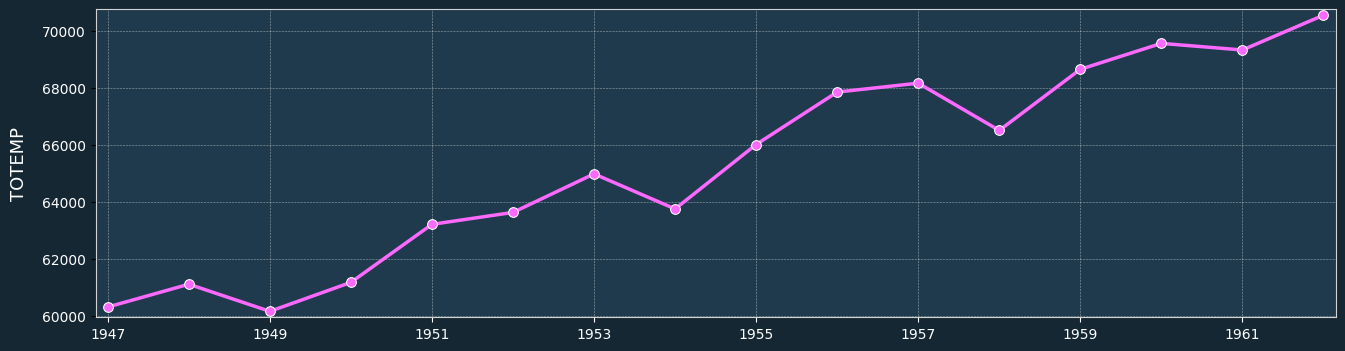

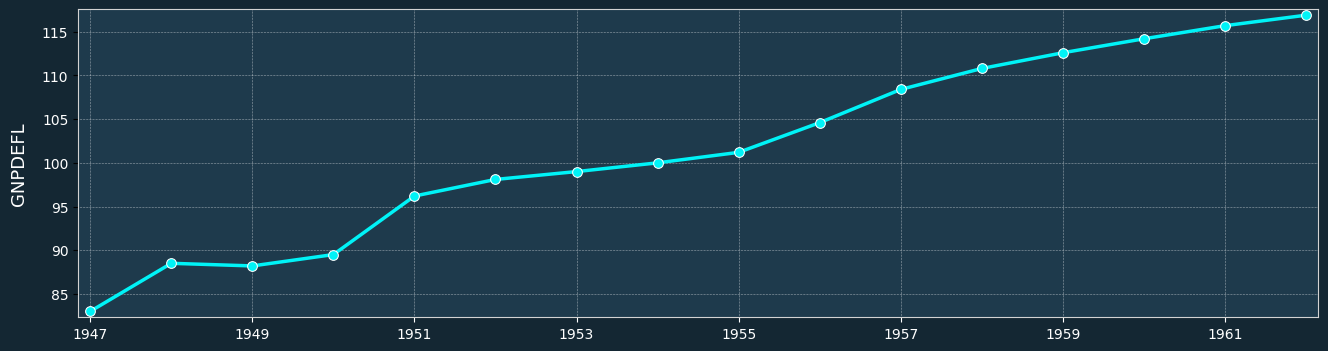

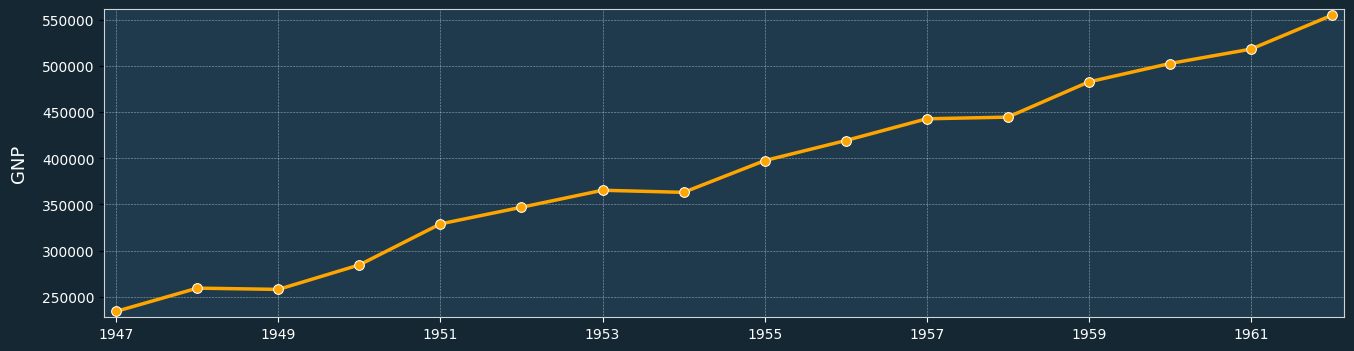

In [25]:
plot_series(targets, colors = ["C0"])
for idx, column in enumerate(inputs.columns[:2]):
	current = inputs[column]
	plot_series(current, colors = ["C" + str(idx+1)])

<a name = 'panel_data'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>Panel Data</font></th>
		</tr>
	</table>
</html>

* repeated observations over time on multiple independent experimental units from one or more related variables or kids of measurement

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #E1C7C2; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3"><a href = "https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.datasets.load_arrow_head.html">Arrowhead Dataset (documentation) </a></font></th>
		</tr>
	</table>
</html>
	
Dimensionality: univariate Series length: 251 Train cases: 36 Test cases: 175 Number of classes: 3

The arrowhead data consists of outlines of the images of arrowheads. The shapes of the projectile points are converted into a time series using the angle-based method. The classification of projectile points is an important topic in anthropology. The classes are based on shape distinctions such as the presence and location of a notch in the arrow. The problem in the repository is a length normalised version of that used in Ye09shapelets. The three classes are called “Avonlea”, “Clovis” and “Mix”.”

In [26]:
import matplotlib.pyplot as plt
from sktime.datasets import load_arrow_head
from sktime.datatypes import convert

In [27]:
inputs, targets = load_arrow_head(return_X_y = True)

head_tail_horz(inputs, 5, 'input data')

input data


,dim_0
0,"0 -1.96 1 -1.96 2 -1.96 3 -1.94 4 -1.90 ... 246 -1.84 247 -1.88 248 -1.91 249 -1.92 250 -1.91 Length: 251, dtype: float64"
1,"0 -1.77 1 -1.77 2 -1.78 3 -1.73 4 -1.70 ... 246 -1.64 247 -1.68 248 -1.73 249 -1.78 250 -1.79 Length: 251, dtype: float64"
2,"0 -1.87 1 -1.84 2 -1.84 3 -1.81 4 -1.76 ... 246 -1.83 247 -1.88 248 -1.86 249 -1.86 250 -1.85 Length: 251, dtype: float64"
3,"0 -2.07 1 -2.07 2 -2.04 3 -2.04 4 -1.96 ... 246 -1.95 247 -2.01 248 -2.03 249 -2.07 250 -2.08 Length: 251, dtype: float64"
4,"0 -1.75 1 -1.74 2 -1.72 3 -1.70 4 -1.68 ... 246 -1.72 247 -1.74 248 -1.74 249 -1.76 250 -1.76 Length: 251, dtype: float64"
,dim_0
206,"0 -1.63 1 -1.62 2 -1.63 3 -1.61 4 -1.57 ... 246 -1.57 247 -1.60 248 -1.62 249 -1.62 250 -1.62 Length: 251, dtype: float64"
207,"0 -1.66 1 -1.66 2 -1.63 3 -1.61 4 -1.59 ... 246 -1.68 247 -1.67 248 -1.67 249 -1.68 250 -1.68 Length: 251, dtype: float64"
208,"0 -1.60 1 -1.59 2 -1.58 3 -1.56 4 -1.53 ... 246 -1.58 247 -1.59 248 -1.60 249 -1.61 250 -1.61 Length: 251, dtype: float64"
209,"0 -1.74 1 -1.74 2 -1.73 3 -1.72 4 -1.70 ... 246 -1.64 247 -1.67 248 -1.70 249 -1.71 250 -1.73 Length: 251, dtype: float64"


In [28]:
head_tail_horz(targets, 5, 'target data')

target data


,0
0,0
1,1
2,2
3,0
4,1
,0
206,2
207,2
208,2
209,2


In [29]:
pretty(inputs.shape, 'inputs.shape before conversion')

inputs.shape before conversion
"(211, 1)"


In [30]:
inputs = convert(inputs, from_type = 'nested_univ', to_type = 'numpy3D')

In [31]:
pretty(inputs.shape, 'inputs.shape after conversion')

inputs.shape after conversion
"(211, 1, 251)"


In [32]:
labels, counts = np.unique(targets, return_counts = True)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Visualization: multiple input samples</font></th>
		</tr>
	</table>
</html>

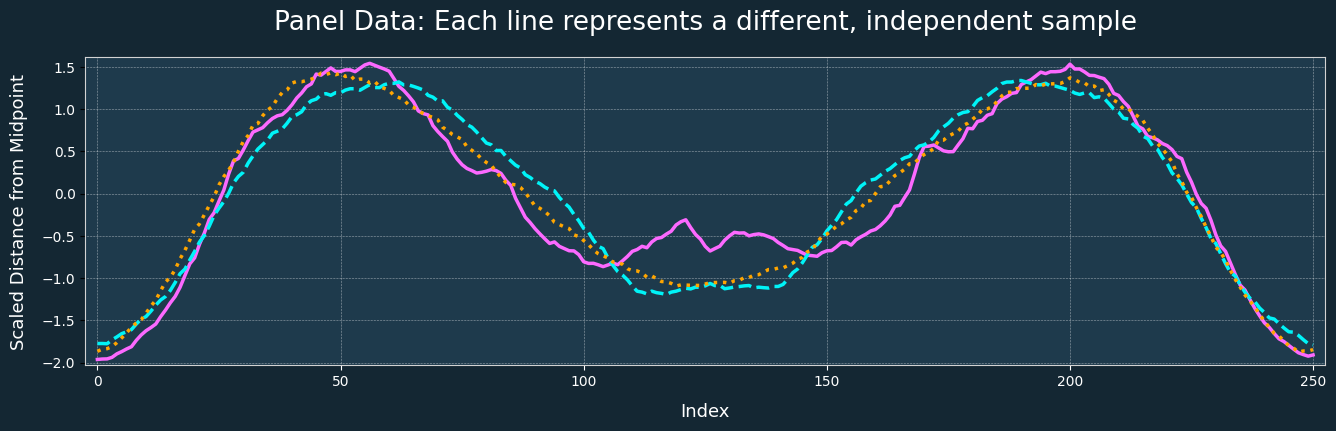

In [33]:
fig, ax = plt.subplots(1, figsize = plt.figaspect(0.25))
for label in labels: 
	ax.plot(inputs[targets == label, 0, :][0], label = f'class {label}');
ax.set(ylabel = 'Scaled Distance from Midpoint', xlabel = 'Index');
ax.set_title('Panel Data: Each line represents a different, independent sample');

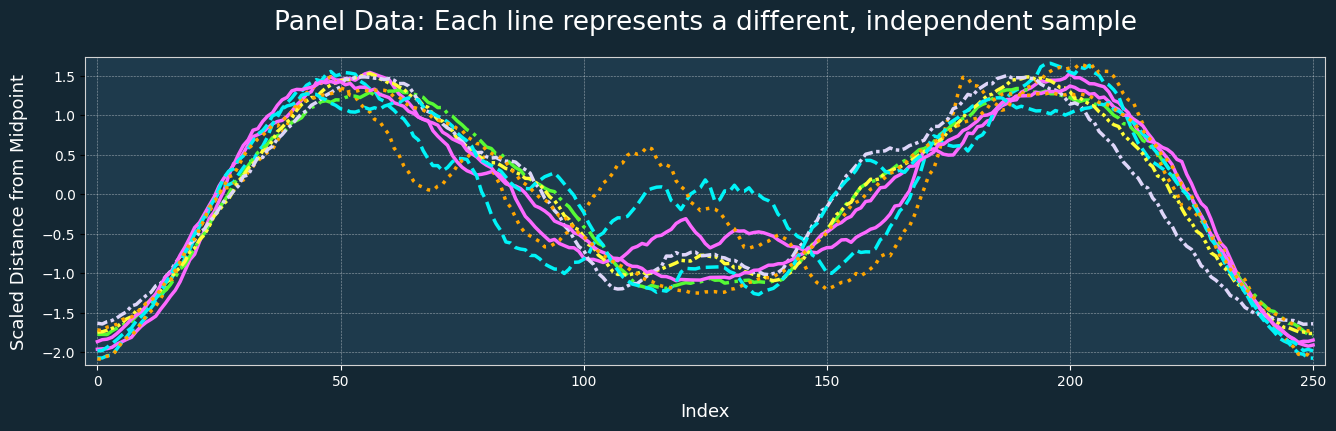

In [34]:
labels, counts = np.unique(targets, return_counts = True)
fig, ax = plt.subplots(1, figsize = plt.figaspect(0.25))
for label in labels: 
	for idx in range(3):
		ax.plot(inputs[targets == label, 0, :][idx], label = f'class {label}');
ax.set(ylabel = 'Scaled Distance from Midpoint', xlabel = 'Index');
ax.set_title('Panel Data: Each line represents a different, independent sample');

<a name = 'sklearn_sktime'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>SKLearn + SKTime: Multiple Learning Tasks</font></th>
		</tr>
	</table>
</html>
	
* **Forecasting (different variations)** - predicting future values for a time serie
* **Time Series Classification** - classifying a time series
* **Time Series Annotation (e.g. outlier detection)** - assigning labels or annotation to time points in a time series
* **Time Series Clustering** - identifying and grouping similar time series
	
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Reduction: From one learning task to another</font></th>
		</tr>
	</table>
</html>
	
<font size = 4>**Overview**</font>

<center><img src="./notebook_images/reduction-relations.png" width = 750/></center>

<font size = 4>**Example: From forecasting to regression** </font>

<center><img src="./notebook_images/forecasting-to-regression-reduction.png" width = 500/></center>
	
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Creating a unified framework</font></th>
		</tr>
	</table>
</html>

* time-series input data
* multiple learning tasks: forecasting, time series classification and more 
* a common estimator API for each learning task
* estimator APIs mirror learning tasks

<center><img src = 'https://i.imgur.com/JGcclfB.png' width = 700></center>
	
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">What's a framework?</font></th>
		</tr>
	</table>
</html>

Check out our [glossary of common terms](https://www.sktime.org/en/stable/glossary.html):

> A collection of related and reusable software design templates that practitioners can copy and fill in. Frameworks emphasize design reuse. They capture common software design decisions within a given application domain and distill them into reusable design templates. This reduces the design decision they must take, allowing them to focus on application specifics. Not only can practitioners write software faster as a result, but applications will have a similar structure. Frameworks often offer additional functionality like toolboxes. Compare with toolbox and application.

Check out our [extension templates](https://github.com/alan-turing-institute/sktime/tree/main/extension_templates)!
	
<center><img src = 'https://i.imgur.com/HKSstog.png' width = 500></center>

<a name = 'uni_forecasting'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>Univariate Forecasting</font></th>
		</tr>
	</table>
</html>
	
* Univariate
* Univariate with exogenous variables 
* Multivariate
	
---
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Univariate forecasting</font></th>
		</tr>
	</table>
</html>

In forecasting, we're interested in using past data to make temporal forward predictions. sktime provides common statistical forecasting algorithms and tools for building composite machine learning models.

<center><img src="./notebook_images/forecasting.png" width=500/></center>


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">The basic workflow</font></th>
		</tr>
	</table>
</html>

1. Specify data
1. Specify task
1. Specify model
1. Fit
1. Predict

In [35]:
from warnings import simplefilter
simplefilter(action="ignore", category=RuntimeWarning)

In [36]:
from sktime.datasets import load_shampoo_sales
from sktime.utils.plotting import plot_series

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Data Specification</style></tr></table></html>

<p>
	
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #E1C7C2; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3"><a href = "https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.datasets.load_shampoo_sales.html">Shampoo Dataset (documentation)</a></font></th>
		</tr>
	</table>
</html>
	
This dataset describes the monthly number of sales of shampoo over a 3 year period. The units are a sales count.

Dimensionality: univariate Series length: 36 Frequency: Monthly Number of cases: 1

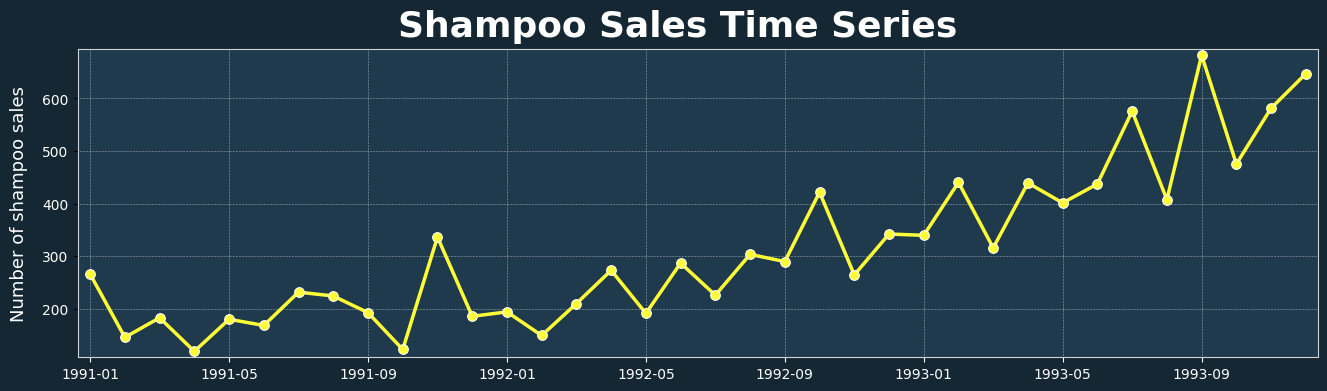

In [37]:
shampoo_data = load_shampoo_sales()
plot_series(shampoo_data, title = "Shampoo Sales Time Series", 
		   colors = ['C4']);

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Task specification</font></th>
		</tr>
	</table>
</html>
	
<font size = 4>Next we will define a **forecasting task**</font>

* We will try to predict the last 6 months of data, using the previous data as training data. Each point in the series represents a month, so we should hold out the last 6 points as test data, and use 6-step ahead forecasting horizon to evaluate forecasting performance.
* We will use the MAPE (mean absolute percentage error) to quantify the accuracy of our forecasts. A lower MAPE means higher accuracy.
	
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">The Forecasting Horizon</font></th>
		</tr>
	</table>
</html>

When we want to generate forecasts, we need to specify the forecasting horizon and pass that to our forecasting algorithm. We can specify the forecasting horizon as a numpy array of the steps ahead relative to the end of the training series:
	
* **`ForcastingHorizon()`**
* **`is_relative = False`** - to specify exact dates. **True** (default) means that each time point will be relative to the last time point in the data

```
Init signature:
ForecastingHorizon(
    values: Union[int, list, numpy.ndarray, pandas.core.indexes.base.Index] = None,
    is_relative: bool = None,
    freq=None,
)
Docstring:     
Forecasting horizon.

Parameters
----------
values : pd.Index, pd.TimedeltaIndex, np.array, list, pd.Timedelta, or int
    Values of forecasting horizon
is_relative : bool, optional (default=None)
    - If True, a relative ForecastingHorizon is created:
            values are relative to end of training series.
    - If False, an absolute ForecastingHorizon is created:
            values are absolute.
    - if None, the flag is determined automatically:
        relative, if values are of supported relative index type
        absolute, if not relative and values of supported absolute index type
freq : str, pd.Index, pandas offset, or sktime forecaster, optional (default=None)
    object carrying frequency information on values
    ignored unless values is without inferrable freq
```

In [38]:
import numpy as np

horizon = np.arange(6) + 1

pretty(horizon, 'Forecasting Horizon: np.arange(6) + 1 -> Relative')

Forecasting Horizon: np.arange(6) + 1 -> Relative
"[1, 2, 3, 4, 5, 6]"


In [39]:
import pandas as pd
from sktime.forecasting.base import ForecastingHorizon

horizon = ForecastingHorizon(
    pd.period_range("1993-07", periods=6, freq="M"), is_relative=False
)

pretty(horizon, 'Forecasting Horizon: pd.period_range("1993-07", periods=6, freq="M) -> Absolute')


"Forecasting Horizon: pd.period_range(""1993-07"", periods=6, freq=""M) -> Absolute"
"ForecastingHorizon(['1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12'], dtype='period[M]', is_relative=False)"


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Converting between absolute and relative forecast horizons</style></tr></table></html>
	
<font size = 4>**to_relative()** - cutoff allows you to determin when/where to convert to relative from absolute
	
Signature: ForecastingHorizon.to_relative(self, cutoff=None)
Docstring:
Return forecasting horizon values relative to a cutoff.
```
Parameters

cutoff : pd.Period, pd.Timestamp, int, or pd.Index, optional (default=None)
    Cutoff value required to convert a relative forecasting
    horizon to an absolute one (and vice versa).
    If pd.Index, last/latest value is considered the cutoff

Returns

fh : ForecastingHorizon
    Relative representation of forecasting horizon.
```

In [40]:
cutoff = pd.Period("1993-06", freq="M")
pretty(horizon.to_relative(cutoff), 'cutoff = pd.Period("1993-06", freq="M") | horizon.to_relative(cutoff)')

"cutoff = pd.Period(""1993-06"", freq=""M"") | horizon.to_relative(cutoff)"
"ForecastingHorizon([1, 2, 3, 4, 5, 6], dtype='int64', is_relative=True)"


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Splitting: <i>temporal_train_test_split()</i></font></th>
		</tr>
	</table>
</html>

```
Signature:
temporal_train_test_split(
    y: Union[pandas.core.series.Series, pandas.core.frame.DataFrame, numpy.ndarray, pandas.core.indexes.base.Index],
    X: Optional[pandas.core.frame.DataFrame] = None,
    test_size: Union[int, float, NoneType] = None,
    train_size: Union[int, float, NoneType] = None,
    fh: Union[int, list, numpy.ndarray, pandas.core.indexes.base.Index, sktime.forecasting.base._fh.ForecastingHorizon, NoneType] = None,
) -> Union[Tuple[pandas.core.series.Series, pandas.core.series.Series], Tuple[pandas.core.series.Series, pandas.core.series.Series, pandas.core.frame.DataFrame, pandas.core.frame.DataFrame]]
Docstring:
Split arrays or matrices into sequential train and test subsets.

Creates train/test splits over endogenous arrays an optional exogenous
arrays.

This is a wrapper of scikit-learn's ``train_test_split`` that
does not shuffle the data.

Parameters
----------
y : pd.Series
    Target series
X : pd.DataFrame, optional (default=None)
    Exogenous data
test_size : float, int or None, optional (default=None)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    relative number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.
train_size : float, int, or None, (default=None)
    If float, should be between 0.0 and 1.0 and represent the
    proportion of the dataset to include in the train split. If
    int, represents the relative number of train samples. If None,
    the value is automatically set to the complement of the test size.
fh : ForecastingHorizon

Returns
-------
splitting : tuple, length=2 * len(arrays)
    List containing train-test split of `y` and `X` if given.

```

In [41]:
from sktime.forecasting.model_selection import temporal_train_test_split

train_targets, test_targets = temporal_train_test_split(shampoo_data, 
														   fh=horizon)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Visualization: forecast horizon for train-test split</font></th>
		</tr>
	</table>
</html>

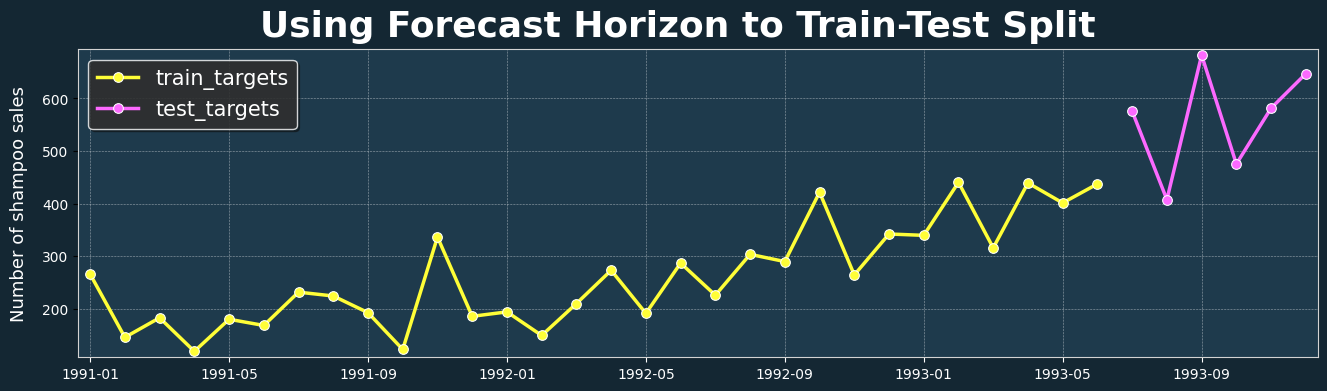

In [42]:
plot_series(train_targets, 
			test_targets, 
			labels=["train_targets", "test_targets"],
		    colors = ['C4', 'C0'],
		    title = 'Using Forecast Horizon to Train-Test Split');

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Model Specification: <i>NaiveForecaster()</i></font></th>
		</tr>
	</table>
</html>
	
<font size = 4>**NaiveForecaster**</font> is a forecaster that makes forecasts using simple
strategies. Two out of three strategies are robust against NaNs. The
NaiveForecaster can also be used for multivariate data and it then
applies internally the ColumnEnsembleForecaster, so each column
is forecasted with the same strategy.
	
Internally, this forecaster does the following:
- obtains the so-called "last window", a 1D array that denotes the
  most recent time window that the forecaster is allowed to use
- reshapes the last window into a 2D array according to the given
  seasonal periodicity (prepended with NaN values to make it fit);
- make a prediction for each column, using the given strategy:
  - "last": last non-NaN row
  - "mean": np.nanmean over rows
- tile the predictions using the seasonal periodicity

To compute prediction quantiles, we first estimate the standard error
of prediction residuals under the assumption of uncorrelated residuals.
The forecast variance is then computed by multiplying the residual
variance by a constant. This constant is a small-sample bias adjustment
and each method (mean, last, drift) have different formulas for computing
the constant. These formulas can be found in the Forecasting:
Principles and Practice textbook (Table 5.2) [1]_. Lastly, under the assumption that residuals follow a normal distribution, we use the forecast variance and z-scores of a normal distribution to estimate the prediction quantiles.
	

```
Parameters
----------
strategy : {"last", "mean", "drift"}, default="last"
    Strategy used to make forecasts:

    * "last":   (robust against NaN values)
                forecast the last value in the
                training series when sp is 1.
                When sp is not 1,
                last value of each season
                in the last window will be
                forecasted for each season.
    * "mean":   (robust against NaN values)
                forecast the mean of last window
                of training series when sp is 1.
                When sp is not 1, mean of all values
                in a season from last window will be
                forecasted for each season.
    * "drift":  (not robust against NaN values)
                forecast by fitting a line between the
                first and last point of the window and
                extrapolating it into the future.

sp : int, or None, default=1
    Seasonal periodicity to use in the seasonal forecasting. None=1.

window_length : int or None, default=None
    Window length to use in the `mean` strategy. If None, entire training
        series will be used.
```

In [43]:
from sktime.forecasting.naive import NaiveForecaster

In [44]:
forecaster = NaiveForecaster(strategy="drift", window_length=10)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Model Fitting: <i>NaiveForecaster.fit()</i></font></th>
		</tr>
	</table>
</html>

* `y` - always required
* `X` - **exogenous data**
	> In an economic model, an **exogenous variable** is one whose measure is determined outside the model and is imposed on the model, and an exogenous change is a change in an exogenous variable
* `fh` - can pass forecast horizon either in fitting or predicting

```
Signature: forecaster.fit(y, X=None, fh=None)
Docstring:
Fit forecaster to training data.

State change:
    Changes state to "fitted".

Writes to self:
    Sets self._is_fitted flag to True.
    Writes self._y and self._X with `y` and `X`, respectively.
    Sets self.cutoff and self._cutoff to last index seen in `y`.
    Sets fitted model attributes ending in "_".
    Stores fh to self.fh if fh is passed.

Parameters
----------
y : time series in sktime compatible data container format
        Time series to which to fit the forecaster.
    y can be in one of the following formats:
    Series scitype: pd.Series, pd.DataFrame, or np.ndarray (1D or 2D)
        for vanilla forecasting, one time series
    Panel scitype: pd.DataFrame with 2-level row MultiIndex,
        3D np.ndarray, list of Series pd.DataFrame, or nested pd.DataFrame
        for global or panel forecasting
    Hierarchical scitype: pd.DataFrame with 3 or more level row MultiIndex
        for hierarchical forecasting
    Number of columns admissible depend on the "scitype:y" tag:
        if self.get_tag("scitype:y")=="univariate":
            y must have a single column/variable
        if self.get_tag("scitype:y")=="multivariate":
            y must have 2 or more columns
        if self.get_tag("scitype:y")=="both": no restrictions on columns apply
    For further details:
        on usage, see forecasting tutorial examples/01_forecasting.ipynb
        on specification of formats, examples/AA_datatypes_and_datasets.ipynb
fh : int, list, np.array or ForecastingHorizon, optional (default=None)
    The forecasting horizon encoding the time stamps to forecast at.
    if self.get_tag("requires-fh-in-fit"), must be passed, not optional
X : time series in sktime compatible format, optional (default=None)
        Exogeneous time series to fit to
    Should be of same scitype (Series, Panel, or Hierarchical) as y
    if self.get_tag("X-y-must-have-same-index"), X.index must contain y.index
    there are no restrictions on number of columns (unlike for y)
```

In [45]:
forecaster.fit(train_targets)

NaiveForecaster(strategy='drift', window_length=10)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Predicting: <i>NaiveForecaster.predict()</i></font></th>
		</tr>
	</table>
</html>

```
Signature: NaiveForecaster.predict(self, fh=None, X=None)
Docstring:
Forecast time series at future horizon.

State required:
    Requires state to be "fitted".

Accesses in self:
    Fitted model attributes ending in "_".
    self.cutoff, self._is_fitted

Writes to self:
    Stores fh to self.fh if fh is passed and has not been passed previously.

Parameters
----------
fh : int, list, np.array or ForecastingHorizon, optional (default=None)
    The forecasting horizon encoding the time stamps to forecast at.
    if has not been passed in fit, must be passed, not optional
X : time series in sktime compatible format, optional (default=None)
        Exogeneous time series to fit to
    Should be of same scitype (Series, Panel, or Hierarchical) as y in fit
    if self.get_tag("X-y-must-have-same-index"), X.index must contain fh.index
    there are no restrictions on number of columns (unlike for y)

Returns
-------
y_pred : time series in sktime compatible data container format
    Point forecasts at fh, with same index as fh
    y_pred has same type as the y that has been passed most recently:
        Series, Panel, Hierarchical scitype, same format (see above)
```

In [46]:
predictions = forecaster.predict(horizon)

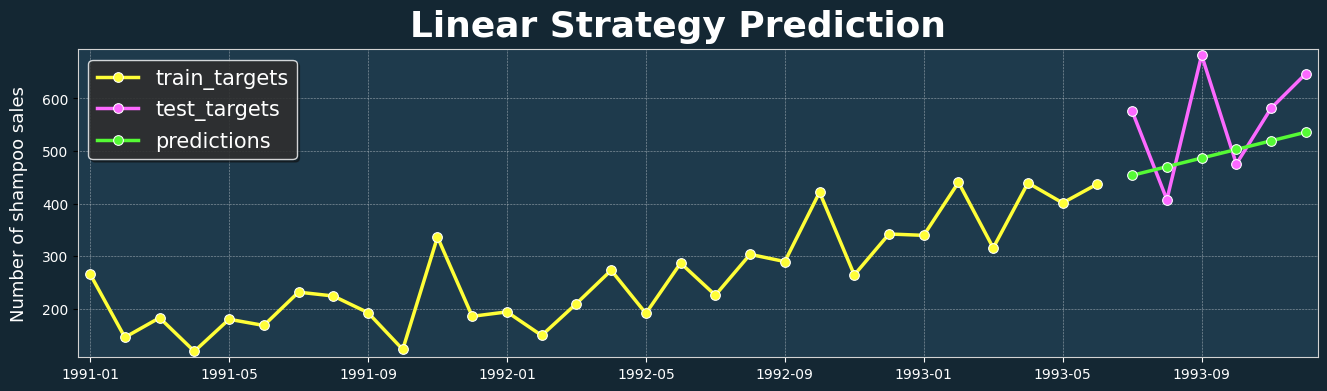

In [47]:
plot_series(train_targets, 
			test_targets, 
			predictions,
			labels=['train_targets', 'test_targets', 'predictions'],
		    colors = ['C4', 'C0', 'C3'],
		    title = 'Linear Strategy Prediction');

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Evaluation: <i>mean_absolute_percentage_error()</i></font></th>
		</tr>
	</table>
</html>

In [48]:
from sktime.performance_metrics.forecasting import \
    mean_absolute_percentage_error

mean_absolute_percentage_error(test_targets, predictions, symmetric=False)

0.16469764622516225

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Another Example</font></th>
		</tr>
	</table>
</html>

* using `AutoARIMA()` rather than `NaiveForecaster()`

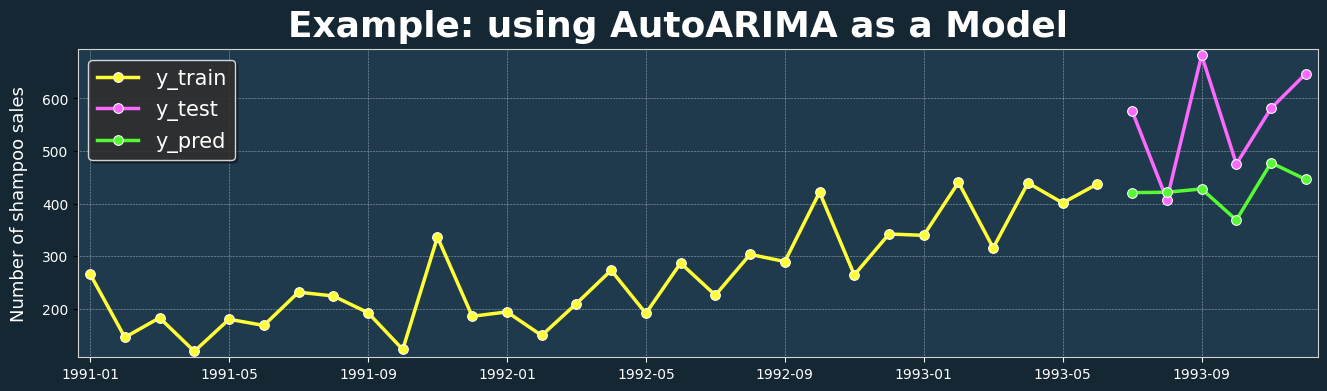

In [49]:
from sktime.forecasting.arima import AutoARIMA

y = load_shampoo_sales()
y_train, y_test = temporal_train_test_split(y, fh=horizon)
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(horizon)
plot_series(y_train, y_test, y_pred, 
			labels=["y_train", "y_test", "y_pred"],
		   colors = ['C4', 'C0', 'C3'],
		   title = 'Example: using AutoARIMA as a Model');

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Summary of basic workflow</font></th>
		</tr>
	</table>
</html>

* single, fixed cutoff point at which we generate predictions
* common interface for forecasters
	
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Forecasters in sktime</font></th>
		</tr>
	</table>
</html>

Check out our online estimator overview at: https://www.sktime.org/en/stable/estimator_overview.html
	
<font size = 4>**all_estimators()**</font>
```
Signature:
all_estimators(
    estimator_types=None,
    filter_tags=None,
    exclude_estimators=None,
    return_names=True,
    as_dataframe=False,
    return_tags=None,
    suppress_import_stdout=True,
)
Docstring:
Get a list of all estimators from sktime.

This function crawls the module and gets all classes that inherit
from sktime's and sklearn's base classes.

Not included are: the base classes themselves, classes defined in test
modules.
```

In [50]:
from sktime.registry import all_estimators

In [116]:
estimators = all_estimators("forecaster", as_dataframe=True)
head_tail_horz(estimators.name, 5, 'Forecaster Estimators (some options)')

Forecaster Estimators (some options)


,name
0,ARDL
1,ARIMA
2,AutoARIMA
3,AutoETS
4,AutoEnsembleForecaster
,name
48,UpdateEvery
49,UpdateRefitsEvery
50,VAR
51,VARMAX


In [52]:
missing_data_estimators = all_estimators("forecaster", 
									   filter_tags = {"handles-missing-data": True}, 
									   as_dataframe=True)

head_tail_horz(missing_data_estimators.name.sample(10), 5, 
			   'Forecaster Estimators (using filters)')

Forecaster Estimators (using filters)


,name
14,RecursiveTabularRegressionForecaster
9,ForecastingPipeline
15,RecursiveTimeSeriesRegressionForecaster
16,StackingForecaster
13,Permute
,name
12,NaiveForecaster
7,DynamicFactor
3,DirRecTabularRegressionForecaster
17,TransformedTargetForecaster


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">But can I not just use scikit-learn?</font></th>
		</tr>
	</table>
</html>

In principle, yes, but many pitfalls ...

See our previous tutorial from the PyData Amsterdam 2020 for more details: https://github.com/sktime/sktime-tutorial-pydata-amsterdam-2020
 
**Better: Use scikit-learn with sktime!**

sktime provides a meta-estimator for this approach, which is: 
* **modular** and **compatible with scikit-learn**, so that we can easily apply any scikit-learn regressor to solve our forecasting problem,
* **parametric** and **tuneable**, allowing us to tune hyper-parameters like the window length or strategy to generate forecasts
* **adaptive**, in the sense that it adapts the scikit-learn's estimator interface to that of a forecaster, making sure that we can tune and properly evaluate our model

<center><img src="./notebook_images/forecasting-to-regression-reduction.png" width=500></center>

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Using a Scikit-Learn Model</font></th>
		</tr>
	</table>
</html>
	
<p>
	
<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #E1C7C2; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3"><a href = "https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.datasets.load_airline.html">Airline Passenger Dataset (documentation)</a>
</font></th>
		</tr>
	</table>
</html>
	
The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960.

Dimensionality: univariate Series length: 144 Frequency: Monthly Number of cases: 1

This data shows an increasing trend, non-constant (increasing) variance and periodic, seasonal patterns.

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Visualization: airline passenger dataset input</font></th>
		</tr>
	</table>
</html>

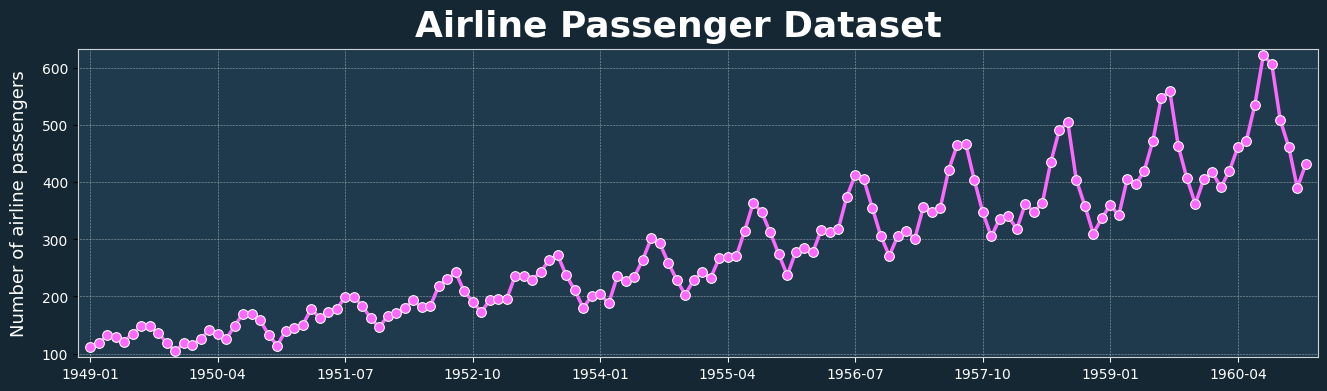

In [53]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

targets = load_airline()
plot_series(targets, colors = ['C6'], title = 'Airline Passenger Dataset');

In [54]:
train_targets, test_targets = temporal_train_test_split(targets, test_size=12)
horizon = ForecastingHorizon(test_targets.index, is_relative=False)

<font size = 4>**`forecasting.compose.make_reduction()`**
	
```
Signature:
make_reduction(
    estimator,
    strategy='recursive',
    window_length=10,
    scitype='infer',
    transformers=None,
    pooling='local',
    windows_identical=True,
)
Docstring:
Make forecaster based on reduction to tabular or time-series regression.

During fitting, a sliding-window approach is used to first transform the
time series into tabular or panel data, which is then used to fit a tabular or
time-series regression estimator. During prediction, the last available data is
used as input to the fitted regression estimator to generate forecasts.

Parameters
----------
estimator : an estimator instance
    Either a tabular regressor from scikit-learn or a time series regressor from
    sktime.
strategy : str, optional (default="recursive")
    The strategy to generate forecasts. Must be one of "direct", "recursive" or
    "multioutput".
window_length : int, optional (default=10)
    Window length used in sliding window transformation.
scitype : str, optional (default="infer")
    Legacy argument for downwards compatibility, should not be used.
    `make_reduction` will automatically infer the correct type of `estimator`.
    This internal inference can be force-overridden by the `scitype` argument.
    Must be one of "infer", "tabular-regressor" or "time-series-regressor".
    If the scitype cannot be inferred, this is a bug and should be reported.
transformers: list of transformers (default = None)
    A suitable list of transformers that allows for using an en-bloc approach with
    make_reduction. This means that instead of using the raw past observations of
    y across the window length, suitable features will be generated directly from
    the past raw observations. Currently only supports WindowSummarizer (or a list
    of WindowSummarizers) to generate features e.g. the mean of the past 7
    observations. Currently only works for RecursiveTimeSeriesRegressionForecaster.
pooling: str {"local", "global"}, optional
    Specifies whether separate models will be fit at the level of each instance
    (local) of if you wish to fit a single model to all instances ("global").
    Currently only works for RecursiveTimeSeriesRegressionForecaster.
windows_identical: bool, (default = True)
    Direct forecasting only.
    Specifies whether all direct models use the same X windows from y (True: Number
    of windows = total observations + 1 - window_length - maximum forecasting
    horizon) or a different number of X windows depending on the forecasting horizon
    (False: Number of windows = total observations + 1 - window_length
    - forecasting horizon). See pictionary below for more information.

```

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Visualization: SKLearn's KNeighbors with recursive strategy</font></th>
		</tr>
	</table>
</html>

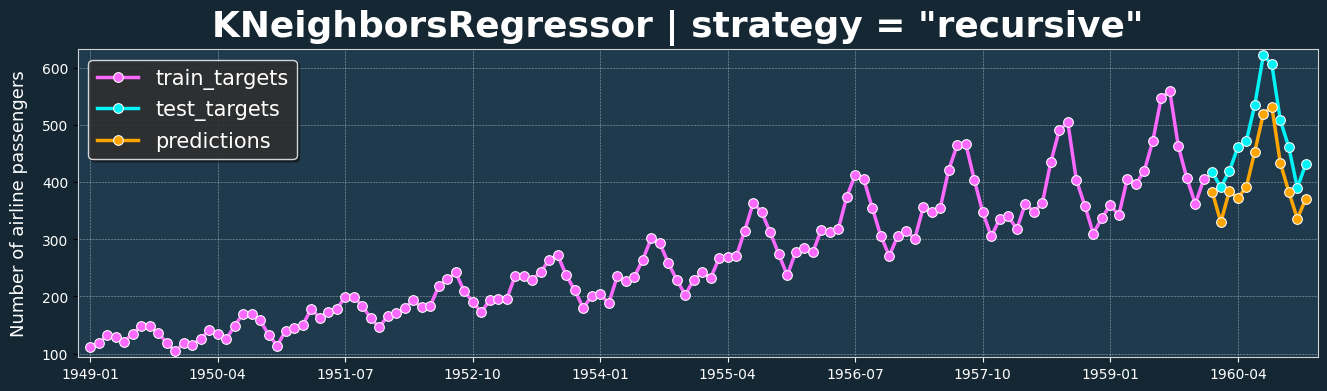

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction

regressor = KNeighborsRegressor(n_neighbors=2)
forecaster = make_reduction(regressor, strategy="recursive", window_length=15)
forecaster.fit(train_targets, fh=horizon)
predictions = forecaster.predict()
plot_series(train_targets, test_targets, predictions, 
			labels=["train_targets", "test_targets", "predictions"],
		   colors = ['C0', 'C1', 'C2'],
		   title = 'KNeighborsRegressor | strategy = "recursive"');

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Visualization: SKLearn's KNeighbors with multioutput strategy</font></th>
		</tr>
	</table>
</html>

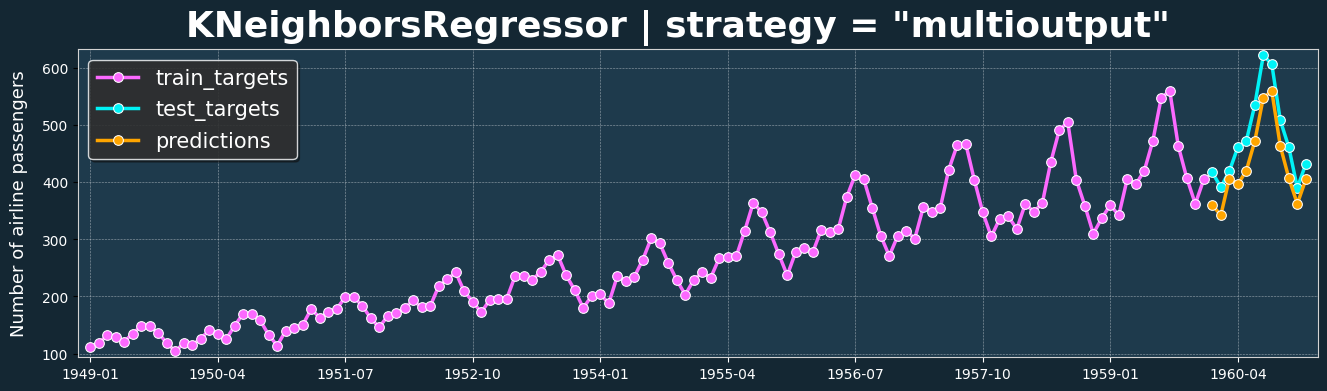

In [56]:
regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = make_reduction(regressor, strategy="multioutput", window_length=7)
forecaster.fit(train_targets, fh=horizon)
predictions = forecaster.predict()
plot_series(train_targets, test_targets, predictions, 
			labels=["train_targets", "test_targets", "predictions"],
		   colors = ['C0', 'C1', 'C2'],
		   title = 'KNeighborsRegressor | strategy = "multioutput"');

<a name = 'advanced_workflow'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>More Advanced workflow</font></th>
		</tr>
	</table>
</html>
	
1. Specify data
1. Specify task
1. Specify model
1. Fit
1. Predict
1. Observe new data
1. Update using new data
1. Repeat steps 5-7 as often as required

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Data specification</font></th>
		</tr>
	</table>
</html>

In [123]:
from sktime.forecasting.ets import AutoETS

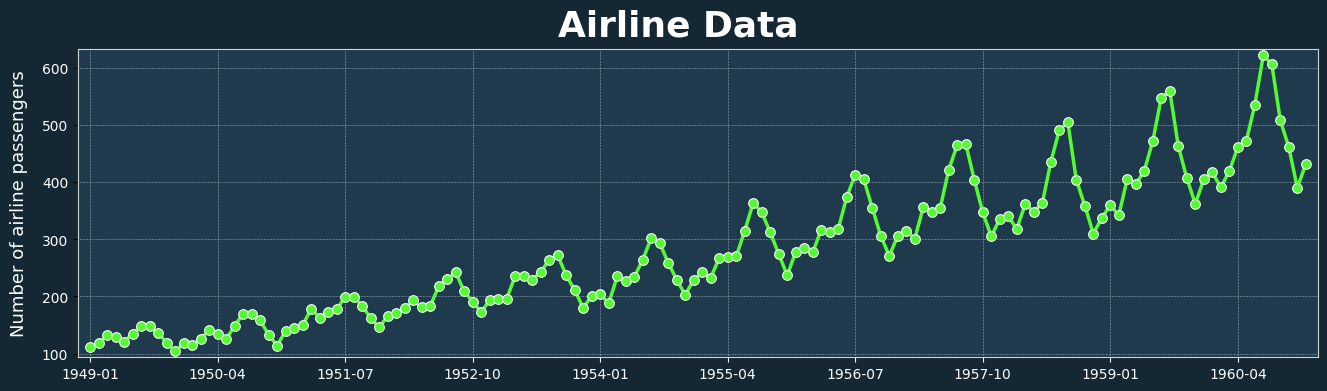

In [124]:
data = load_airline()
plot_series(data, colors = ['C3'], title = 'Airline Data');

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Task specification</font></th>
		</tr>
	</table>
</html>

In [125]:
# specifying the forecasting horizon: one year ahead, all months
horizon = np.arange(1, 13)
pretty(horizon, 'Forecast Horizon  |  np.arange(1, 13)')

"Forecast Horizon | np.arange(1, 13)"
"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"


In [126]:
train_data = data.loc[:"1957-08"]
observed_data = train_data.copy()
observed_data.tail()

1957-04   348.00
1957-05   355.00
1957-06   422.00
1957-07   465.00
1957-08   467.00
Freq: M, Name: Number of airline passengers, dtype: float64

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Model specification</font></th>
		</tr>
	</table>
</html>

In [127]:
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Fitting</font></th>
		</tr>
	</table>
</html>

In [128]:
forecaster.fit(train_data)

AutoETS(auto=True, n_jobs=-1, sp=12)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Prediction</font></th>
		</tr>
	</table>
</html>

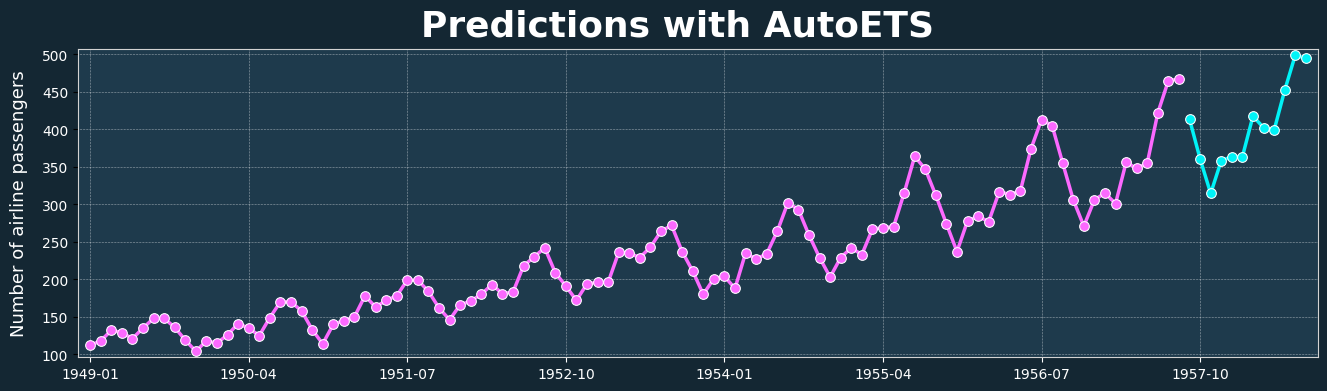

In [129]:
predictions = forecaster.predict(horizon)
plot_series(observed_data, predictions, colors = ['C0', 'C1'], 
		   title = 'Predictions with AutoETS');

In [130]:
predictions

1957-09   413.46
1957-10   360.57
1957-11   314.50
1957-12   358.25
1958-01   363.38
1958-02   363.45
1958-03   417.74
1958-04   402.20
1958-05   398.85
1958-06   451.96
1958-07   498.86
1958-08   494.80
Freq: M, dtype: float64

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Observe new data</font></th>
		</tr>
	</table>
</html>

In [132]:
oberved_data = data.loc[:"1957-09"]
new_data = data.loc[["1957-09"]]
new_data

1957-09   404.00
Freq: M, Name: Number of airline passengers, dtype: float64

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Update</font></th>
		</tr>
	</table>
</html>

In [133]:
forecaster.update(new_data)

AutoETS(auto=True, n_jobs=-1, sp=12)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Predict again</font></th>
		</tr>
	</table>
</html>

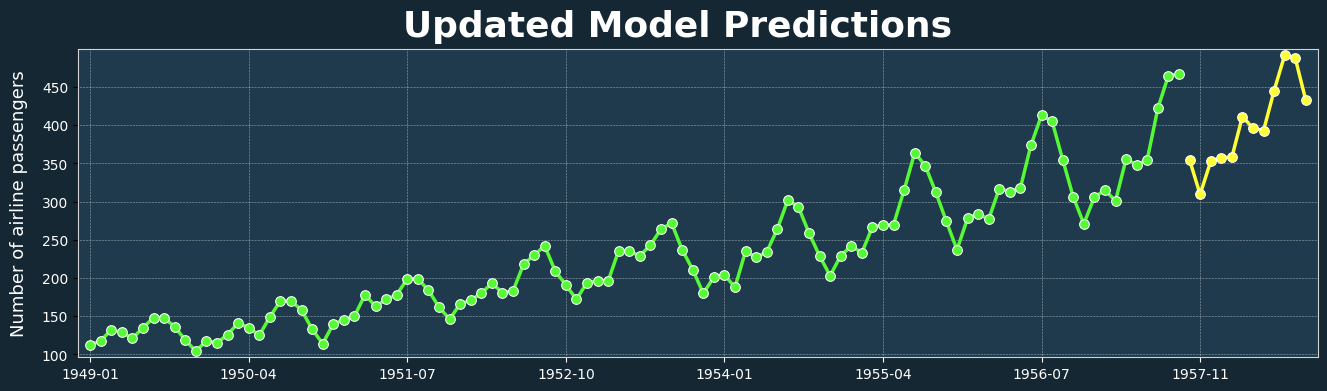

In [134]:
predictions = forecaster.predict(horizon)
plot_series(observed_data, predictions,
		   colors = ['C3', 'C4'],
		   title = 'Updated Model Predictions');

In [135]:
predictions

1957-10   354.74
1957-11   309.49
1957-12   352.61
1958-01   357.73
1958-02   357.87
1958-03   411.40
1958-04   396.16
1958-05   392.94
1958-06   445.34
1958-07   491.65
1958-08   487.74
1958-09   432.52
Freq: M, dtype: float64

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Understanding update</font></th>
		</tr>
	</table>
</html>


In [69]:
forecaster.update?

Signature: forecaster.update(y, X=None, update_params=True)
Docstring:
Update cutoff value and, optionally, fitted parameters.

If no estimator-specific update method has been implemented,
default fall-back is as follows:
    update_params=True: fitting to all observed data so far
    update_params=False: updates cutoff and remembers data only

State required:
    Requires state to be "fitted".

Accesses in self:
    Fitted model attributes ending in "_".
    Pointers to seen data, self._y and self.X
    self.cutoff, self._is_fitted
    If update_params=True, model attributes ending in "_".

Writes to self:
    Update self._y and self._X with `y` and `X`, by appending rows.
    Updates self.cutoff and self._cutoff to last index seen in `y`.
    If update_params=True,
        updates fitted model attributes ending in "_".

Parameters
----------
y : time series in sktime compatible data container format
        Time series to which to fit the forecaster in the update.
    y can be in one

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Automating the process</font></th>
		</tr>
	</table>
</html>

In [70]:
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.utils.plotting import plot_windows

In [71]:
data = load_airline()
horizon = ForecastingHorizon(np.arange(12) + 1)
train_data, test_data = temporal_train_test_split(data, fh = horizon)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Temporal cross-validation</font></th>
		</tr>
	</table>
</html>

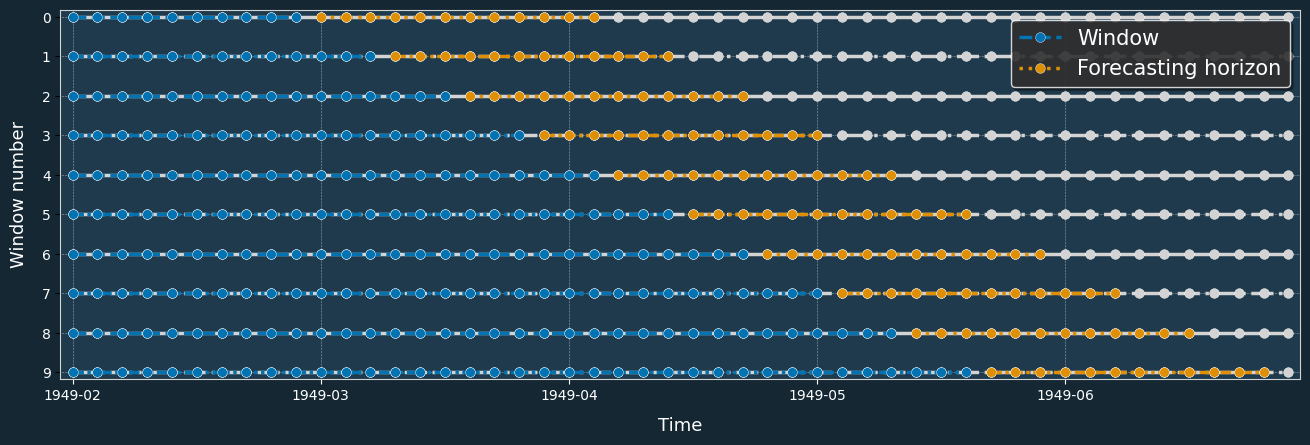

In [72]:
cv = ExpandingWindowSplitter(step_length = 3, 
							 fh = horizon, 
							 initial_window = 10)
plot_windows(cv, data.iloc[:50])

Check out alternative cross-validation schemes: https://github.com/alan-turing-institute/sktime/blob/main/examples/window_splitters.ipynb

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Backtesting: Evaluation using temporal cross-validaton</font></th>
		</tr>
	</table>
</html>

In [73]:
forecaster = NaiveForecaster(strategy="last", sp=12)

In [74]:
cv = ExpandingWindowSplitter(step_length=12, fh=horizon, initial_window=72)

In [75]:
results = evaluate(forecaster=forecaster, 
				   y=data, 
				   cv=cv, 
				   strategy="refit", 
				   return_data=True)

results.iloc[:, :5].head()

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.16,0.00,0.00,72,1954-12
1,0.13,0.00,0.00,84,1955-12
2,0.11,0.00,0.00,96,1956-12
3,0.03,0.00,0.00,108,1957-12
4,0.11,0.00,0.00,120,1958-12


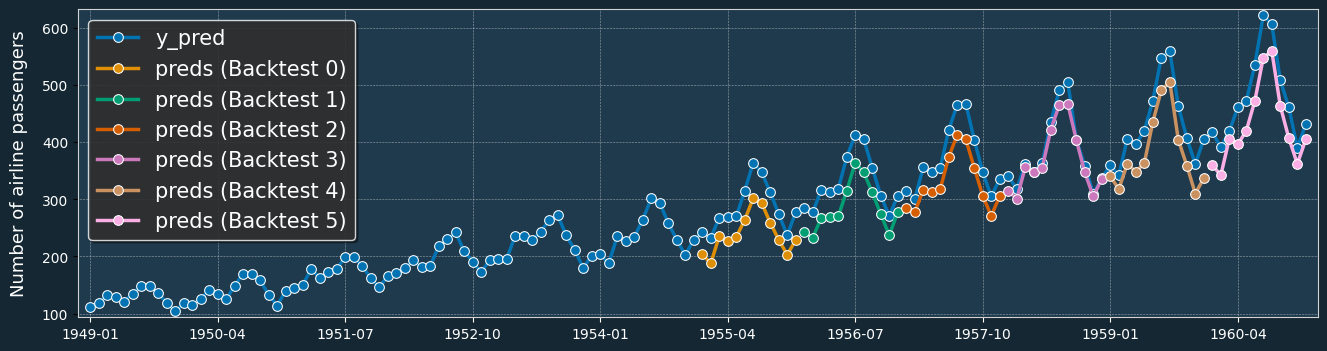

In [76]:
fig, ax = plot_series(
    data,
    results['y_pred'].iloc[0],
    results['y_pred'].iloc[1],
    results['y_pred'].iloc[2],
    results['y_pred'].iloc[3],
    results['y_pred'].iloc[4],
    results['y_pred'].iloc[5],
    labels=['y_pred'] + ["preds (Backtest " + str(x) + ")" for x in range(6)],
	colors = ['C0', 'C1' 'C2', 'C3', 'C4', 'C5', 'C6']
)
ax.legend();

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Advanced model building & composition</font></th>
		</tr>
	</table>
</html>

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Tuning</font></th>
		</tr>
	</table>
</html>

In [77]:
from sktime.forecasting.model_selection import (ForecastingGridSearchCV,
                                                SlidingWindowSplitter)

In [78]:
param_grid = {"window_length": [9, 12, 15], 
			  "estimator__n_neighbors": np.arange(1, 10)}

In [79]:
regressor = KNeighborsRegressor()

forecaster = make_reduction(regressor, 
							strategy="recursive")

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3"><b><i>SlidingWindowSplittler & ForcastingGridSearchCV</b></i></font></th>
		</tr>
	</table>
</html>

In [80]:
cv = SlidingWindowSplitter(window_length=60, fh=horizon)

gscv = ForecastingGridSearchCV(forecaster, 
							   cv=cv, 
							   param_grid=param_grid, 
							   strategy="refit")

In [81]:
gscv.fit(train_data)

ForecastingGridSearchCV(cv=SlidingWindowSplitter(fh=ForecastingHorizon([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', is_relative=True),
                                                 window_length=60),
                        forecaster=RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor()),
                        param_grid={'estimator__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                    'window_length': [9, 12, 15]})

In [82]:
predictions = gscv.predict(horizon)

0.12411154270928935

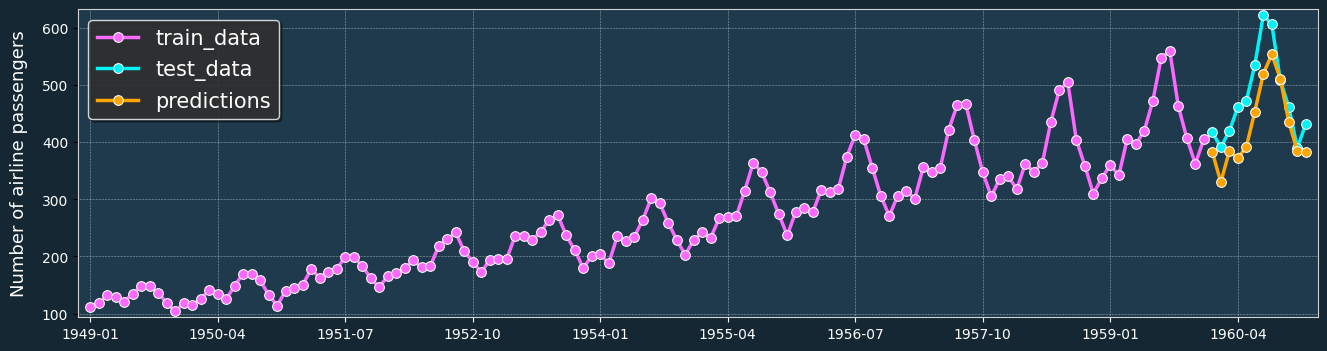

In [83]:
plot_series(train_data, test_data, predictions, 
			labels = ['train_data', 'test_data', 'predictions'],
		    colors = ['C0', 'C1', 'C2'])

mean_absolute_percentage_error(predictions, test_data)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3"><b><i>ForcastingGridSearchCV.best_params_</b></i></font></th>
		</tr>
	</table>
</html>

In [84]:
gscv.best_params_

{'estimator__n_neighbors': 2, 'window_length': 12}

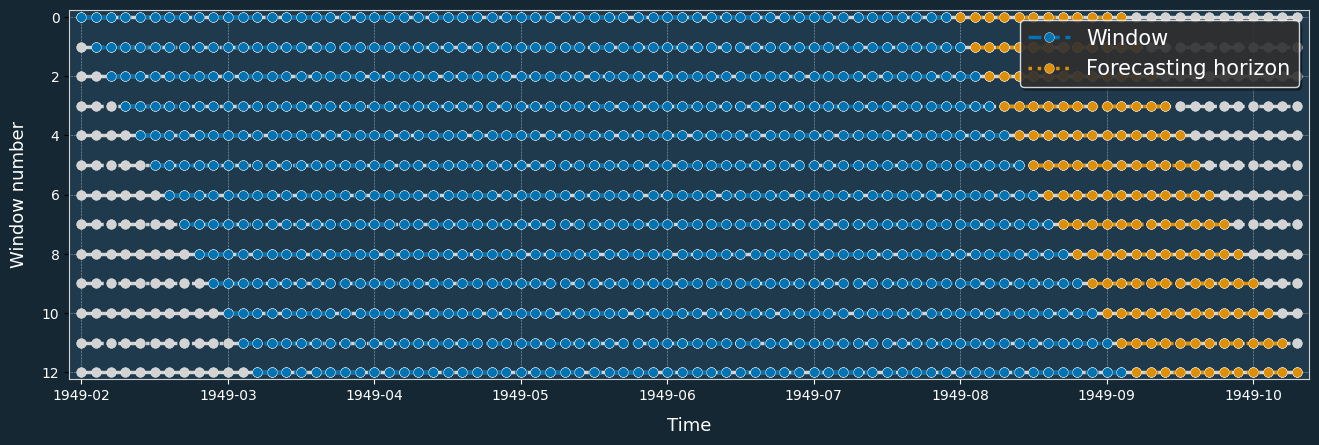

In [85]:
plot_windows(cv, data.iloc[:84])

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Tuning and AutoML</font></th>
		</tr>
	</table>
</html>

In [86]:
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster

In [87]:
forecaster = MultiplexForecaster(
    forecasters=[
        ("naive", NaiveForecaster(strategy="last")),
        ("ets", ExponentialSmoothing(trend="add", sp=12)),],)

In [88]:
forecaster_param_grid = {"selected_forecaster": ["ets", "naive"]}
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid)

gscv.fit(train_data)
gscv.best_params_

{'selected_forecaster': 'ets'}

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Pipelining</font></th>
		</tr>
	</table>
</html>

In [89]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

In [90]:
regressor = KNeighborsRegressor()
forecaster = make_reduction(regressor, strategy="recursive")

In [91]:
forecaster = TransformedTargetForecaster(
							[("deseasonalize", Deseasonalizer(sp=12)),
							 ("detrend", Detrender()),
							 ("forecast", forecaster),])

In [92]:
forecaster.fit(y_train)
predictions = forecaster.predict(horizon)

<a name = 'exogeneous'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>Forecasting with Exogenous Variables</font></th>
		</tr>
	</table>
</html>

* a single target (or endogeneous) series, observed only in the past 
* one ore more related (exogeneous) time series, observed in the past and period of forecasting horizon

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Basic Workflow</font></th>
		</tr>
	</table>
</html>

In [93]:
from sktime.datasets import load_longley

In [94]:
y, X = load_longley()

In [95]:
y.head()

Period
1947   60,323.00
1948   61,122.00
1949   60,171.00
1950   61,187.00
1951   63,221.00
Freq: A-DEC, Name: TOTEMP, dtype: float64

In [96]:
X.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
Period,,,,,
1947,83.00,"234,289.00","2,356.00","1,590.00","107,608.00"
1948,88.50,"259,426.00","2,325.00","1,456.00","108,632.00"
1949,88.20,"258,054.00","3,682.00","1,616.00","109,773.00"
1950,89.50,"284,599.00","3,351.00","1,650.00","110,929.00"
1951,96.20,"328,975.00","2,099.00","3,099.00","112,075.00"


In [97]:
fh = np.arange(5) + 1
y_train, y_test, X_train, X_pred = temporal_train_test_split(y, X, fh=fh)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='TOTEMP'>)

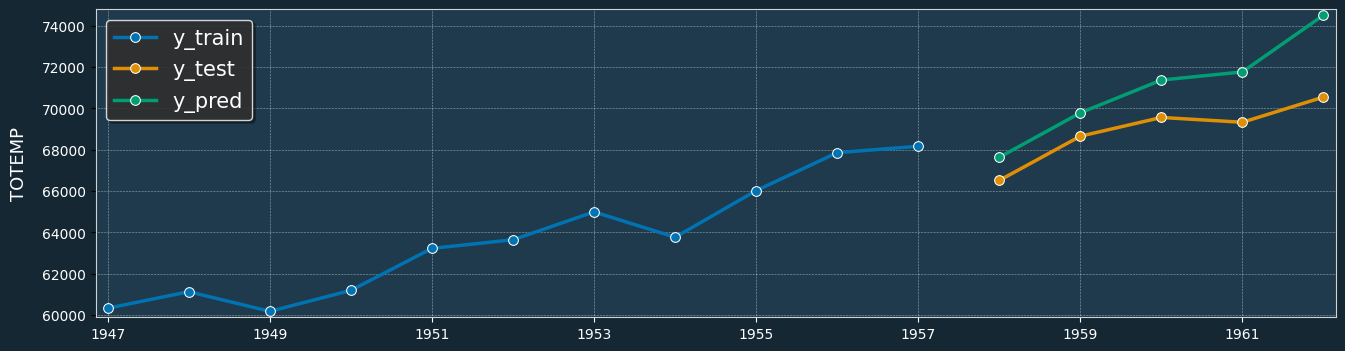

In [98]:
forecaster = AutoARIMA()
forecaster.fit(y_train, X_train)
y_pred = forecaster.predict(fh, X=X_pred)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Pipelining with Exogeneous Data</font></th>
		</tr>
	</table>
</html>

In [99]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sktime.datasets import load_macroeconomic
from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sktime.transformations.series.impute import Imputer

In [100]:
data = load_macroeconomic()
y = data["unemp"]
X = data.drop(columns=["unemp"])

In [101]:
y_train, y_test, X_train, X_test = temporal_train_test_split(y, X)
fh = ForecastingHorizon(y_test.index, is_relative=False)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='unemp'>)

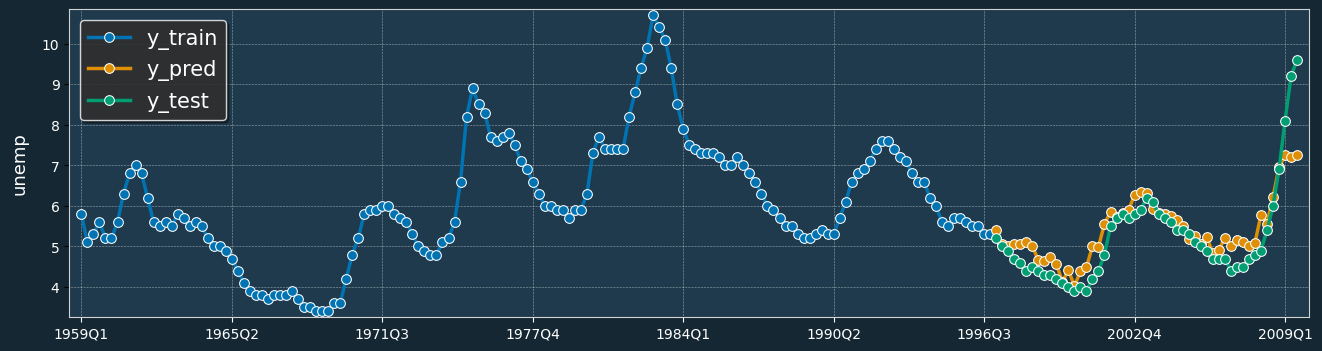

In [102]:
forecaster = ForecastingPipeline(
    steps=[
        ("imputer", Imputer(method="mean")),
        ("scale", TabularToSeriesAdaptor(MinMaxScaler(feature_range=(1, 2)))),
        ("boxcox", TabularToSeriesAdaptor(PowerTransformer(method="box-cox"))),
        ("forecaster", AutoARIMA(suppress_warnings=True)),
    ]
)
forecaster.fit(y=y_train, X=X_train)
y_pred = forecaster.predict(fh=fh, X=X_test)

plot_series(y_train, y_pred, y_test, labels=["y_train", "y_pred", "y_test"])

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Multivariate Forecasting: Multiple Target Series</font></th>
		</tr>
	</table>
</html>

In [103]:
all_estimators(
    "forecaster",
    filter_tags={"scitype:y": ["both", "multivariate"]},
    return_names=False,
)

[sktime.forecasting.compose._column_ensemble.ColumnEnsembleForecaster,
 sktime.forecasting.dynamic_factor.DynamicFactor,
 sktime.forecasting.compose._ensemble.EnsembleForecaster,
 sktime.forecasting.compose._grouped.ForecastByLevel,
 sktime.forecasting.model_selection._tune.ForecastingGridSearchCV,
 sktime.forecasting.compose._pipeline.ForecastingPipeline,
 sktime.forecasting.model_selection._tune.ForecastingRandomizedSearchCV,
 sktime.forecasting.compose._multiplexer.MultiplexForecaster,
 sktime.forecasting.compose._pipeline.Permute,
 sktime.param_est.plugin.PluginParamsForecaster,
 sktime.forecasting.compose._pipeline.TransformedTargetForecaster,
 sktime.forecasting.var.VAR,
 sktime.forecasting.varmax.VARMAX,
 sktime.forecasting.vecm.VECM]

In [104]:
_, y = load_longley()
y = y.iloc[:, 2:4]

fh = np.arange(3) + 1
y_train, y_test = temporal_train_test_split(y, fh=fh)

In [105]:
y_train.head()

,UNEMP,ARMED
Period,,
1947,"2,356.00","1,590.00"
1948,"2,325.00","1,456.00"
1949,"3,682.00","1,616.00"
1950,"3,351.00","1,650.00"
1951,"2,099.00","3,099.00"


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">By-variable ensembling</font></th>
		</tr>
	</table>
</html>

In [106]:
from sktime.forecasting.compose import ColumnEnsembleForecaster

forecasters = [
    ("trend", PolynomialTrendForecaster(), 0),
    ("ses", ExponentialSmoothing(), 1),
]
forecaster = ColumnEnsembleForecaster(forecasters=forecasters)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_pred.head()

,UNEMP,ARMED
1960,"3,688.65","2,552.43"
1961,"3,794.19","2,552.43"
1962,"3,899.72","2,552.43"


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Bespoke multivariate models</font></th>
		</tr>
	</table>
</html>

In [107]:
from sktime.forecasting.var import VAR

forecaster = VAR()
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_pred.head()

,UNEMP,ARMED
1960,"3,322.41","2,611.27"
1961,"3,153.43","2,673.11"
1962,"3,095.84","2,725.06"


In [108]:
from sktime.forecasting.var import VAR

forecaster = VAR()
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_pred.head()

,UNEMP,ARMED
1960,"3,322.41","2,611.27"
1961,"3,153.43","2,673.11"
1962,"3,095.84","2,725.06"


<a name = 'building_forecaster'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>Building a Forecaster</font></th>
		</tr>
	</table>
</html>

Check out our [forecasting extension template](https://github.com/alan-turing-institute/sktime/blob/main/extension_templates/forecasting.py)!

This is a Python file with to-do code blocks that allow you to implement your own, sktime-compatible forecasting algorithm.


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Summary</font></th>
		</tr>
	</table>
</html>

* unified API for univariate & multivariate forecasting 
* integrating other packages (e.g. scikit-learn, statsmodels, pmdarima, prophet)
* composite model building (pipelining, ensembling, tuning, reduction)
* easily extendible

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">Useful Resources</font></th>
		</tr>
	</table>
</html>

* For more details, take a look at [our paper on forecasting with sktime](https://arxiv.org/abs/2005.08067) in which we discuss the forecasting API in more detail and use it to replicate and extend the M4 study.
* For a good introduction to forecasting, see [Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018](https://otexts.com/fpp2/).
* For comparative benchmarking studies/forecasting competitions, see the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) and the [M5 competition](https://www.kaggle.com/c/m5-forecasting-accuracy/overview).


<a name = 'time_series_classification'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>Time Series Classification</font></th>
		</tr>
	</table>
</html>




<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Univariate time series classification</font></th>
		</tr>
	</table>
</html>

In univariate time series classification, we have a single time series variable and an associated label for multiple instances. The goal is to find a classifier that can learn the relationship between the time series and labels, and accurately predict the label of a new, unlabelled series. sktime provides time series classification algorithms and tools for building composite machine learning models.

<center><img src="./notebook_images/time-series-classification.png" width=500/></center>


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">The basic workflow</font></th>
		</tr>
	</table>
</html>

1. Specify data
1. Specify task: Which variable is the target variable, which ones are features?
1. Specify model
1. Fit
1. Predict

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Data</font></th>
		</tr>
	</table>
</html>

To find other datasets, go to: http://timeseriesclassification.com/dataset.php

In [109]:
from warnings import simplefilter

simplefilter(action="ignore", category=FutureWarning)

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from sktime.datasets import load_UCR_UEA_dataset
from sktime.datatypes import convert

inputs, targets = load_UCR_UEA_dataset("ItalyPowerDemand", return_X_y=True)
inputs = convert(inputs, from_type="nested_univ", to_type="numpy3D")

In [172]:
pretty(inputs.shape, 'inputs.shape')

inputs.shape
"(1096, 1, 24)"


In [173]:
# binary target variable
pretty(np.unique(targets), 'np.unique(targets)')

np.unique(targets)
"['1', '2']"


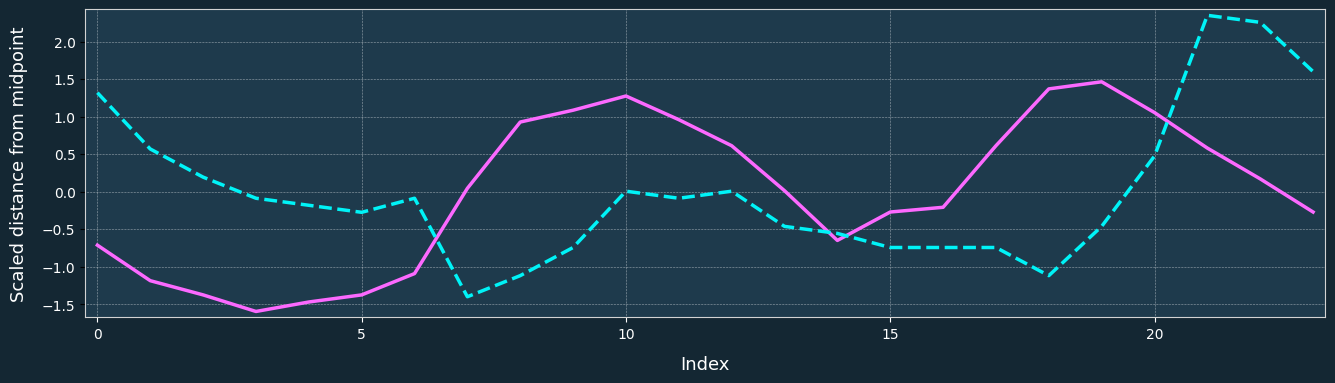

In [179]:
labels, counts = np.unique(targets, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    ax.plot(inputs[targets == label, 0, :][0], label=f"class {label}")
ax.set(ylabel="Scaled distance from midpoint", xlabel="Index");

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Train-test split</font></th>
		</tr>
	</table>
</html>

In [180]:
from sklearn.model_selection import train_test_split

train_in, test_in, train_out, test_out = train_test_split(inputs, targets)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Model specification</font></th>
		</tr>
	</table>
</html>

Find out more about ROCKET:
* Repo: https://github.com/angus924/rocket
* Blog post: https://pub.towardsai.net/rocket-fast-and-accurate-time-series-classification-f54923ad0ac9

In [193]:
from sktime.classification.kernel_based import RocketClassifier
classifier = RocketClassifier()

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Fitting</font></th>
		</tr>
	</table>
</html>

In [194]:
%%time
classifier.fit(train_in, train_out)

RocketClassifier()

In [196]:
classifier.fit?

Signature: classifier.fit(X, y)
Docstring:
Fit time series classifier to training data.

Parameters
----------
X : 3D np.array (any number of dimensions, equal length series)
        of shape [n_instances, n_dimensions, series_length]
    or 2D np.array (univariate, equal length series)
        of shape [n_instances, series_length]
    or pd.DataFrame with each column a dimension, each cell a pd.Series
        (any number of dimensions, equal or unequal length series)
    or of any other supported Panel mtype
        for list of mtypes, see datatypes.SCITYPE_REGISTER
        for specifications, see examples/AA_datatypes_and_datasets.ipynb
y : 1D np.array of int, of shape [n_instances] - class labels for fitting
    indices correspond to instance indices in X

Returns
-------
self : Reference to self.

Notes
-----
Changes state by creating a fitted model that updates attributes
ending in "_" and sets is_fitted flag to True.
File:      ~/opt/anaconda3/envs/time_series_projects/lib/python

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Prediction</font></th>
		</tr>
	</table>
</html>

In [197]:
predictions = classifier.predict(test_in)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Evaluation</font></th>
		</tr>
	</table>
</html>

In [198]:
from sklearn.metrics import accuracy_score

accuracy_score(test_out, predictions)

0.9781021897810219

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Classifiers in SKTIme</font></th>
		</tr>
	</table>
</html>

In [199]:
from sktime.registry import all_estimators

all_estimators("classifier", return_names=False)

[sktime.classification.kernel_based._arsenal.Arsenal,
 sktime.classification.dictionary_based._boss.BOSSEnsemble,
 sktime.classification.deep_learning.cnn.CNNClassifier,
 sktime.classification.interval_based._cif.CanonicalIntervalForest,
 sktime.classification.feature_based._catch22_classifier.Catch22Classifier,
 sktime.classification.compose._pipeline.ClassifierPipeline,
 sktime.classification.compose._column_ensemble.ColumnEnsembleClassifier,
 sktime.classification.compose._ensemble.ComposableTimeSeriesForestClassifier,
 sktime.classification.dictionary_based._cboss.ContractableBOSS,
 sktime.classification.interval_based._drcif.DrCIF,
 sktime.classification.dummy._dummy.DummyClassifier,
 sktime.classification.distance_based._elastic_ensemble.ElasticEnsemble,
 sktime.classification.deep_learning.fcn.FCNClassifier,
 sktime.classification.feature_based._fresh_prince.FreshPRINCE,
 sktime.classification.hybrid._hivecote_v1.HIVECOTEV1,
 sktime.classification.hybrid._hivecote_v2.HIVECOTEV2,

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">But can I not just use scikit-learn?</font></th>
		</tr>
	</table>
</html>

In principle, yes, but may not be as powerful as dedicated time series classification algorithms ...

See our previous tutorial from the PyData Amsterdam 2020 for more details: https://github.com/sktime/sktime-tutorial-pydata-amsterdam-2020
 
**Compare algorithms from sktime and scikit-learn!**

In [200]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sktime.transformations.panel.reduce import Tabularizer

In [201]:
classifier = make_pipeline(Tabularizer(), 
						   KNeighborsClassifier(n_neighbors=1, 
												metric="euclidean"))

In [202]:
classifier.fit(train_in, train_out)

Pipeline(steps=[('tabularizer', Tabularizer()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=1))])

In [203]:
predictions = classifier.predict(test_in)

In [204]:
accuracy_score(test_out, predictions)

0.9708029197080292

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Advanced Model Building and Composition</font></th>
		</tr>
	</table>
</html>

* Pipelining
* Ensembling
* Tuning
* Reduction

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Pipelining</font></th>
		</tr>
	</table>
</html>

Check out the tsfresh package for automatic feature extraction: https://tsfresh.readthedocs.io/en/latest/

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

In [208]:
%%time
classifier = make_pipeline(TSFreshFeatureExtractor(disable_progressbar=True,
												   show_warnings=False),
						   RandomForestClassifier(),)

ModuleNotFoundError: TSFreshFeatureExtractor requires python version to be <3.10, but system python version is 3.10.9 (main, Jan 11 2023, 09:18:20) [Clang 14.0.6 ].

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

<a name = 'time_series_regression'></a>

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |</font></th>
		</tr>
		<tr>
			<th style = 'background-color: #3D5F74; padding: 5px 5px 3px 5px; line-height: 1.5; color:white;border-radius: 3px;' colspan="3"><font size = 6>Time Series Regression</font></th>
		</tr>
	</table>
</html>




<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 16px; font-weight: 500; background-color: #DBE5EB; padding: 5px 5px 3px 10px; line-height: 1.5; text-align: left; color:black;border-radius: 3px;' colspan="3">The basic workflow</font></th>
		</tr>
	</table>
</html>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import load_benzene_concentration_sample

Find out more about the dataset here: https://zenodo.org/record/3902673#.YXqxNy8w3UI

In [ ]:
X, y = load_benzene_concentration_sample()
print(X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
fig, ax = plt.subplots(1)
ax.hist(y)
ax.set(xlabel="target variable (bins)", ylabel="frequency");

In [ ]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for i in range(5):
    ax.plot(X_train[i, 0, :])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sktime.transformations.panel.rocket import Rocket

In [ ]:
%%time
regressor = make_pipeline(Rocket(), RandomForestRegressor())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Reducing forecasting to time series </font></th>
		</tr>
	</table>
</html>
<img src="./notebook_images/forecasting-to-regression-reduction.png" width=500 align=right />

In [ ]:
import numpy as np
from sktime.datasets import load_airline
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

y = load_airline()
fh = np.arange(12) + 1
y_train, y_test = temporal_train_test_split(y, fh=fh)

In [ ]:
forecaster = make_reduction(
    regressor, scitype="time-series-regressor", window_length=12
)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Look up the term "scitype" in our glossary:</font></th>
		</tr>
	</table>
</html>

<font size = 4> https://www.sktime.org/en/stable/glossary.html#term-Scientific-type

In [ ]:
%%time
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Detrender

pipe = TransformedTargetForecaster([("detrend", Detrender()), ("forecast", forecaster)])
pipe.fit(y_train)
y_pred = pipe.predict(fh)

In [ ]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Multivariate Time Series Classification</font></th>
		</tr>
	</table>
</html>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.transformations.panel.compose import ColumnConcatenator

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Loading Multivariate Time Series/Panel Data</font></th>
		</tr>
	</table>
</html>

The [data set](http://www.timeseriesclassification.com/description.php?Dataset=BasicMotions) we use in this notebook was generated as part of a student project where four students performed four activities whilst wearing a smart watch. The watch collects 3D accelerometer and a 3D gyroscope It consists of four classes, which are walking, resting, running and badminton. Participants were required to record motion a total of five times, and the data is sampled once every tenth of a second, for a ten second period.

In [ ]:
X, y = load_UCR_UEA_dataset("BasicMotions", return_X_y=True)
X = convert(X, from_type="nested_univ", to_type="numpy3D")

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
# multi-class target variable
np.unique(y_train)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Multivariate Classification</font></th>
		</tr>
	</table>
</html>

`sktime` offers three main ways of solving multivariate time series classification problems:

1. _Concatenation_ of time series columns into a single long time series column via `ColumnConcatenator` and apply a classifier to the concatenated data,
2. _Column-wise ensembling_ via `ColumnEnsembleClassifier` in which one classifier is fitted for each time series column and their predictions aggregated,
3. _Bespoke estimator-specific methods_ for handling multivariate time series data, e.g. finding shapelets in multidimensional spaces (still work in progress).

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Time Series Concatenation</font></th>
		</tr>
	</table>
</html>

We can concatenate multivariate time series/panel data into long univiariate time series/panel and then apply a classifier to the univariate data.

In [ ]:
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=100)),
]
classifier = Pipeline(steps)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Column Ensembling</font></th>
		</tr>
	</table>
</html>

We can also fit one classifier for each time series column and then aggregated their predictions. The interface is similar to the familiar `ColumnTransformer` from sklearn.

In [ ]:
classifier = ColumnEnsembleClassifier(
    estimators=[
        ("TSF0", TimeSeriesForestClassifier(n_estimators=10), [0]),
        ("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),
    ]
)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Bespoke classification algorithms</font></th>
		</tr>
	</table>
</html>

Another approach is to use bespoke (or classifier-specific) methods for multivariate time series data. Here, we try out the HIVE-COTE (version 2) algorithm in multidimensional space.

Check out the research paper: https://link.springer.com/article/10.1007%2Fs10994-021-06057-9

In [ ]:
%%time
from sktime.classification.hybrid import HIVECOTEV2

X_train, y_train = load_UCR_UEA_dataset("BasicMotions", split="train", return_X_y=True)
X_test, y_test = load_UCR_UEA_dataset("BasicMotions", split="test", return_X_y=True)

classifier = HIVECOTEV2(
    stc_params={"n_shapelet_samples": 1000},
    drcif_params={"n_estimators": 25},
    arsenal_params={"n_estimators": 10},
    tde_params={"n_parameter_samples": 100},
    verbose=0,
)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 20px; font-weight: 525; background-color: #DBE5EB; padding: 5px 5px 3px 5px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Building a Classifier</font></th>
		</tr>
	</table>
</html>

Check out our [classifier extension template](https://github.com/alan-turing-institute/sktime/blob/main/extension_templates/classification.py)!

This is a Python file with to-do code blocks that allow you to implement your own, sktime-compatible classification algorithm.


<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Summary</font></th>
		</tr>
	</table>
</html>

* univariate time series classification
* time series regression
* reduction: using time series regression for forecasting
* multivariate time series classification

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Useful Resources</font></th>
		</tr>
	</table>
</html>

#### Research and benchmarking
* For time-series classification data sets and Java-based methods, check out [timeseriesclassification.com](http://www.timeseriesclassification.com)
* For a comparative benchmarking studies, check out 
    * [Bagnall, Anthony, et al. "The great time series classification bake off: a review and experimental evaluation of recent algorithmic advances." Data Mining and Knowledge Discovery 31.3 (2017): 606-660.](https://www.researchgate.net/profile/Anthony_Bagnall/publication/301856632_The_Great_Time_Series_Classification_Bake_Off_An_Experimental_Evaluation_of_Recently_Proposed_Algorithms_Extended_Version/links/579b580e08ae80bf6ea33d12.pdf) and 
    * [Fawaz, Hassan Ismail, et al. "Deep learning for time series classification: a review." Data Mining and Knowledge Discovery 33.4 (2019): 917-963.](https://arxiv.org/pdf/1809.04356)

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'font-size: 17px; font-weight: 525; background-color: #E1C7C2; padding: 3px 3px 2px 3px; line-height: 1.5; color:black;border-radius: 3px;' colspan="3">Deep Learning</font></th>
		</tr>
	</table>
</html>

* For deep-learning, check out sktime's companion packages: [sktime-dl](https://github.com/sktime/sktime-dl)

---

<html>
	<table style="width:100%;">
		<tr>
			<th style = 'background-color: #E1C7C2; padding: 5px 5px 3px 5px; line-height: 1.5; color:black; border-radius: 3px; font-size: 14px; font-weight: 500;' colspan="3"> |  <a href="#top">Top</a>  |  <a href="#scikit_learn">SciKit-Learn Way</a>  |  <a href="#sktime">SKTime Way</a>   |  <a href="#multivariate">Multivariate</a>  |  <a href="#panel_data">Panel Data</a>  |  <a href="#sklearn_sktime">SKLearn & SKTime</a>  |  <a href="#uni_forecasting">Univariate Forecasting</a>  |  <a href="#advanced_workflow">Advanced Workflow</a>  |  <a href="#exogeneous">Forecasting with Exogeneous</a>  |  <a href="#building_forecaster">Building a Forecaster</a>  |  <a href="#time_series_classification">Time Series Classification</a>  |  <a href="#time_series_regression">Time Series Regression</a>  |  <a href="#link">Link</a>  |  <a href="#link">Link</a></font></th>
		</tr>
		</table></html>
		
---